In [13]:
from __future__ import division
from __future__ import print_function

import time
import argparse
import numpy as np

import torch
import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt

from pygcn.utils import load_data, accuracy
from pygcn.models import GCN

In [8]:
fastmode = False
epochs = 500
lr = 0.01
weight_decay = 5e-4
hidden = 16
dropout = 0.5

cuda = torch.cuda.is_available()

np.random.seed(3)
torch.manual_seed(3)
if cuda:
    torch.cuda.manual_seed(3)

# Load data
adj, features, labels, idx_train, idx_val, idx_test = load_data(path="./data/cora/", dataset="cora")
print("Finished loading")
def test():
    model.eval()
    output = model(features, adj)
    loss_test = F.nll_loss(output[idx_test], labels[idx_test])
    acc_test = accuracy(output[idx_test], labels[idx_test])
    print("Test set results:",
        "loss= {:.4f}".format(loss_test.item()),
        "accuracy= {:.4f}".format(acc_test.item()))
    return loss_test.item(), acc_test.item()

def train(epoch):
    t = time.time()
    model.train()
    optimizer.zero_grad()
    output = model(features, adj)
    loss_train = F.nll_loss(output[idx_train], labels[idx_train])
    acc_train = accuracy(output[idx_train], labels[idx_train])
    loss_train.backward()
    optimizer.step()

    if not fastmode:
        # Evaluate validation set performance separately,
        # deactivates dropout during validation run.
        model.eval()
        output = model(features, adj)

    loss_val = F.nll_loss(output[idx_val], labels[idx_val])
    acc_val = accuracy(output[idx_val], labels[idx_val])
    print('Epoch: {:04d}'.format(epoch+1),
        'loss_train: {:.4f}'.format(loss_train.item()),
        'acc_train: {:.4f}'.format(acc_train.item()),
        'loss_val: {:.4f}'.format(loss_val.item()),
        'acc_val: {:.4f}'.format(acc_val.item()),
        'time: {:.4f}s'.format(time.time() - t))


Loading cora dataset...
Finished loading


In [9]:
tab_acc = []
tab_loss = []
tab_ep = []

for i in range(1,10):
    # Model and optimizer
    model = GCN(nfeat=features.shape[1],
                nhid=hidden,
                nclass=labels.max().item() + 1,
                dropout=dropout)
    optimizer = optim.Adam(model.parameters(),
                        lr=lr, weight_decay=weight_decay)

    if cuda:
        model.cuda()
        features = features.cuda()
        adj = adj.cuda()
        labels = labels.cuda()
        idx_train = idx_train.cuda()
        idx_val = idx_val.cuda()
        idx_test = idx_test.cuda()

    # Train model
    t_total = time.time()
    for epoch in range(epochs * i):
        train(epoch)
    print("Optimization Finished!")
    print("Total time elapsed: {:.4f}s".format(time.time() - t_total))

    # Testing
    loss, acc = test()
    tab_acc.append(acc)
    tab_loss.append(loss)
    tab_ep.append(epochs * i)

cc_val: 0.8233 time: 0.0229s
Epoch: 4294 loss_train: 0.2197 acc_train: 0.9643 loss_val: 0.6098 acc_val: 0.8200 time: 0.0307s
Epoch: 4295 loss_train: 0.2203 acc_train: 0.9714 loss_val: 0.6111 acc_val: 0.8200 time: 0.0217s
Epoch: 4296 loss_train: 0.1708 acc_train: 0.9929 loss_val: 0.6106 acc_val: 0.8200 time: 0.0329s
Epoch: 4297 loss_train: 0.1858 acc_train: 0.9857 loss_val: 0.6111 acc_val: 0.8200 time: 0.0331s
Epoch: 4298 loss_train: 0.2042 acc_train: 0.9857 loss_val: 0.6124 acc_val: 0.8200 time: 0.0303s
Epoch: 4299 loss_train: 0.1873 acc_train: 0.9857 loss_val: 0.6133 acc_val: 0.8200 time: 0.0165s
Epoch: 4300 loss_train: 0.1989 acc_train: 0.9786 loss_val: 0.6144 acc_val: 0.8233 time: 0.0260s
Epoch: 4301 loss_train: 0.2064 acc_train: 0.9857 loss_val: 0.6147 acc_val: 0.8200 time: 0.0258s
Epoch: 4302 loss_train: 0.1985 acc_train: 0.9714 loss_val: 0.6135 acc_val: 0.8233 time: 0.0278s
Epoch: 4303 loss_train: 0.1724 acc_train: 0.9929 loss_val: 0.6144 acc_val: 0.8233 time: 0.0247s
Epoch: 4304

NameError: name 'plt' is not defined

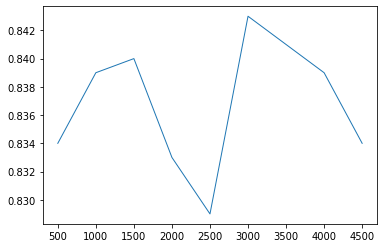

In [15]:
plt.plot(tab_ep, tab_acc, linewidth=1.0, linestyle="-")

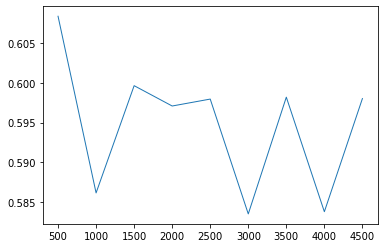

In [16]:
plt.plot(tab_ep, tab_loss, linewidth=1.0, linestyle="-")